In [1]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split 
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
import torch.optim as optim

In [3]:
train_data= datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor())
test_data= datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

In [4]:
train_load=torch.utils.data.DataLoader(dataset=train_data,batch_size=1000,shuffle=True)
test_load=torch.utils.data.DataLoader(dataset=test_data,batch_size=1000,shuffle=True)

In [5]:
class node(nn.Module):
    def __init__(self):
        super(node, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [6]:
model = node()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

In [7]:
model=model.cuda()

In [8]:
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for i,(images, labels) in enumerate(train_load):
        images=images.cuda()
        labels=labels.cuda()
        outputs = model(images)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        print(f" for loop {i} loss is {loss}")

    print(f"Epoch [{epoch}], Loss: {running_loss/len(train_load):.4f}")

 for loop 0 loss is 2.304885149002075
 for loop 1 loss is 11.753173828125
 for loop 2 loss is 2.9288783073425293
 for loop 3 loss is 2.306272506713867
 for loop 4 loss is 2.300140142440796
 for loop 5 loss is 2.3009493350982666
 for loop 6 loss is 2.3017396926879883
 for loop 7 loss is 2.2977774143218994
 for loop 8 loss is 2.2718493938446045
 for loop 9 loss is 2.234058141708374
 for loop 10 loss is 2.1649723052978516
 for loop 11 loss is 2.0905113220214844
 for loop 12 loss is 1.970759630203247
 for loop 13 loss is 1.7929519414901733
 for loop 14 loss is 1.5460987091064453
 for loop 15 loss is 1.2263413667678833
 for loop 16 loss is 0.9401255249977112
 for loop 17 loss is 0.7482193112373352
 for loop 18 loss is 0.667822003364563
 for loop 19 loss is 0.5656193494796753
 for loop 20 loss is 0.5363530516624451
 for loop 21 loss is 0.640135645866394
 for loop 22 loss is 0.5499563217163086
 for loop 23 loss is 0.5832866430282593
 for loop 24 loss is 0.5461683869361877
 for loop 25 loss is

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_load:
        images=images.cuda()
        labels=labels.cuda()

        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 98.86%


In [10]:
import matplotlib.pyplot as plt

FIlters for Convolutional neural network 1 

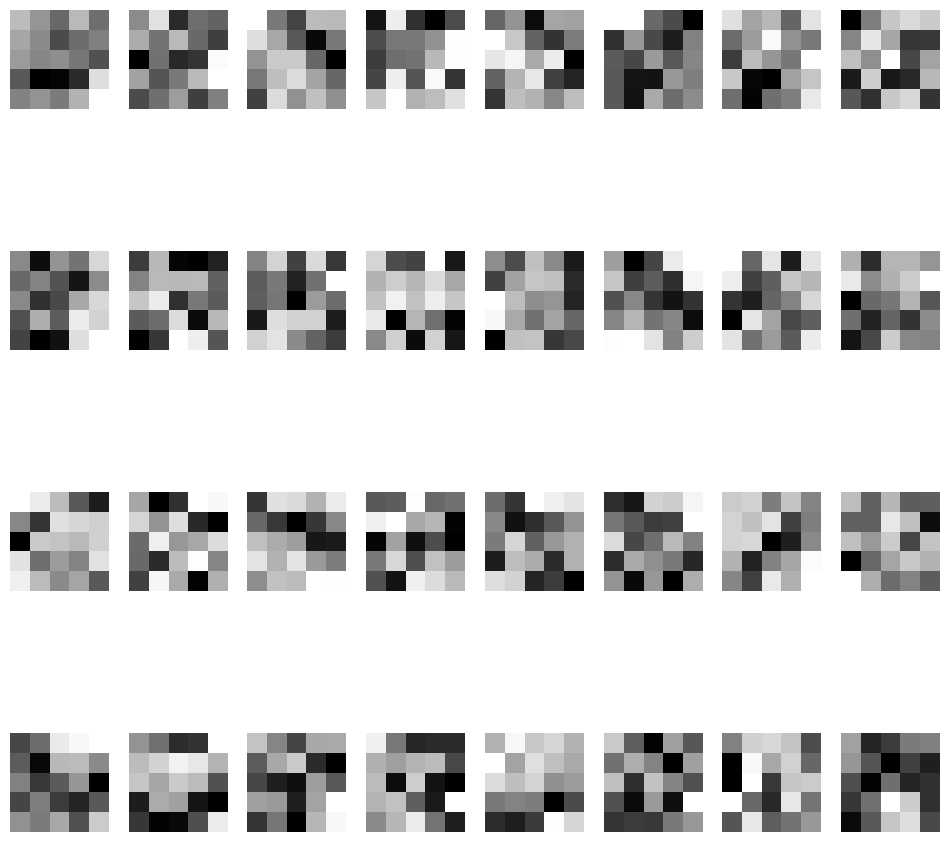

In [14]:
filters = model.conv1.weight.data.clone()
filters = filters - filters.min()
filters = filters / filters.max()

fig, axes = plt.subplots(4, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < filters.size(0):
        ax.imshow(filters[i, 0, :, :].cpu(), cmap='gray')
        ax.axis('off')
plt.show()

Filters for layer 2 convolutional

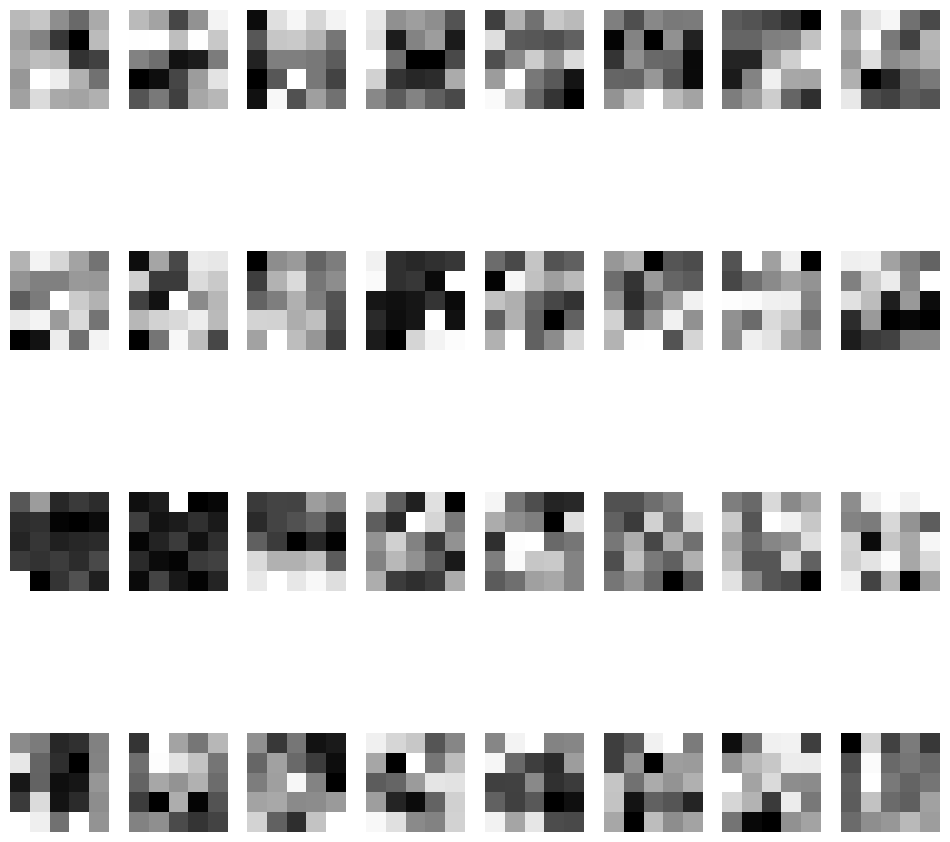

In [15]:
filters = model.conv2.weight.data.clone()
filters = filters - filters.min()
filters = filters / filters.max()

fig, axes = plt.subplots(4, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    if i < filters.size(0):
        ax.imshow(filters[i, 0, :, :].cpu(), cmap='gray')
        ax.axis('off')
plt.show()